In [21]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [5]:
df = pd.read_csv("books.csv", on_bad_lines='skip')
df.head()


bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng          870        2153167               29221   
2           eng          352           6333                 244   
3           eng          435        2339585               36325   
4           eng         2690          41428                 164   

  publication_date        publisher  
0        9/16/2006  Scholastic Inc.  
1         9/1/2004  Scholastic Inc.  
2        11/1/2003       Scholastic  
3         5/1/2004  Scholastic Inc.  
4        9/13/2004       Scholastic

In [22]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rating_obj'],
      dtype='object')

In [23]:
df.shape

(11123, 13)

In [24]:
df.columns=df.columns.str.strip()

In [25]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
rating_obj             object
dtype: object

In [ ]:
df.describe(include='all')

bookID      title       authors  average_rating        isbn  \
count   11123.000000      11123         11123    11123.000000       11123   
unique           NaN      10348          6639             NaN       11123   
top              NaN  The Iliad  Stephen King             NaN  0439785960   
freq             NaN          9            40             NaN           1   
mean    21310.856963        NaN           NaN        3.934075         NaN   
std     13094.727252        NaN           NaN        0.350485         NaN   
min         1.000000        NaN           NaN        0.000000         NaN   
25%     10277.500000        NaN           NaN        3.770000         NaN   
50%     20287.000000        NaN           NaN        3.960000         NaN   
75%     32104.500000        NaN           NaN        4.140000         NaN   
max     45641.000000        NaN           NaN        5.000000         NaN   

              isbn13 language_code     num_pages  ratings_count  \
count   1.112300e+04         11123  11123.000000   1.112300e+04   
unique           NaN            27           NaN            NaN   
top              NaN           eng           NaN            NaN   
freq             NaN          8908           NaN            NaN   
mean    9.759880e+12           NaN    336.405556   1.794285e+04   
std     4.429758e+11           NaN    241.152626   1.124992e+05   
min     8.987060e+09           NaN      0.000000   0.000000e+00   
25%     9.780345e+12           NaN    192.000000   1.040000e+02   
50%     9.780582e+12           NaN    299.000000   7.450000e+02   
75%     9.780872e+12           NaN    416.000000   5.000500e+03   
max     9.790008e+12           NaN   6576.000000   4.597666e+06   

        text_reviews_count publication_date publisher  
count         11123.000000            11123     11123  
unique                 NaN             3679      2290  
top                    NaN        10/1/2005   Vintage  
freq                   NaN               56       318  
mean            542.048099              NaN       NaN  
std            2576.619589              NaN       NaN  
min               0.000000              NaN       NaN  
25%               9.000000              NaN       NaN  
50%              47.000000              NaN       NaN  
75%             238.000000              NaN       NaN  
max           94265.000000              NaN       NaN

In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#feature engineering

1.   extrating features
2.   reducing size of features
3.  creating new features from existing featuresist item




In [ ]:
df.drop(['bookID', 'isbn', 'isbn13'], axis =1 , inplace = True)
df.columns


Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [ ]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [ ]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])
df.head(2)

title  \
0  Harry Potter and the Half-Blood Prince (Harry ...   
1  Harry Potter and the Order of the Phoenix (Har...   

                      authors  average_rating language_code  num_pages  \
0  J.K. Rowling/Mary GrandPré            4.57           eng        652   
1  J.K. Rowling/Mary GrandPré            4.49           eng        870   

   ratings_count  text_reviews_count publication_date        publisher  year  
0        2095690               27591        9/16/2006  Scholastic Inc.  2006  
1        2153167               29221         9/1/2004  Scholastic Inc.  2004

In [ ]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [ ]:
df.year =df.year.astype(int)

In [ ]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int64
dtype: object

#EDA(Exploratory Data Analysis)

In [ ]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

title       authors  average_rating language_code  \
9664  A Quick Bite (Argeneau #1)  Lynsay Sands            3.91           eng   

     publisher  
9664      Avon

In [ ]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)


year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

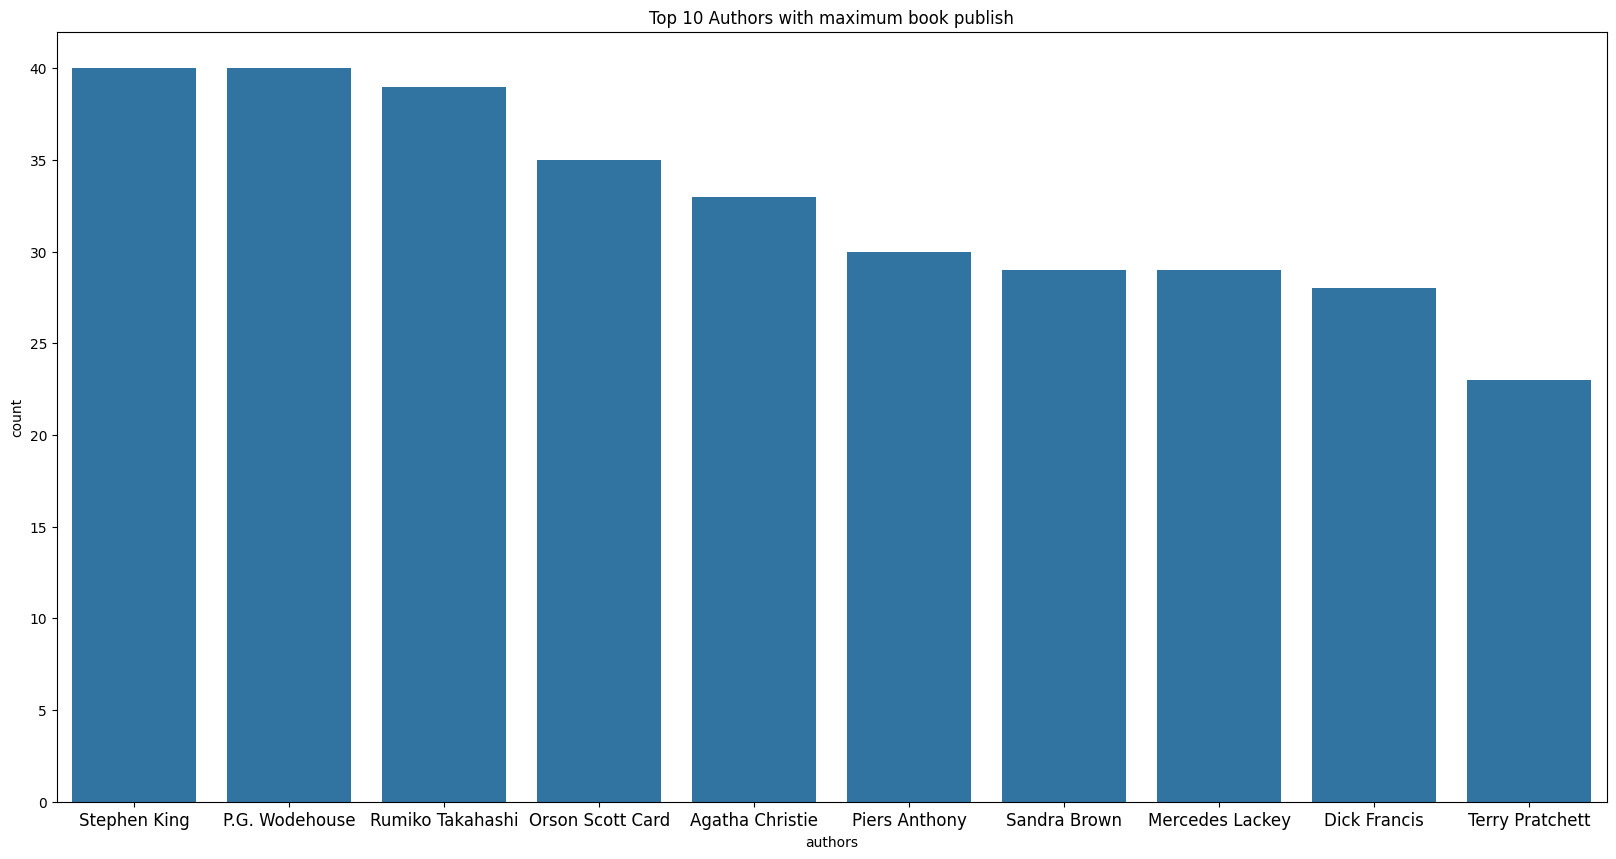

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [ ]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [ ]:
df.groupby(['language_code'])[['average_rating',
                               'ratings_count',
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')

In [ ]:
book = df['title'].value_counts()[:20]
book

title
The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Sense and Sensibility         6
Robinson Crusoe               6
Treasure Island               6
Jane Eyre                     6
Romeo and Juliet              6
Collected Stories             6
The Secret Garden             6
The Scarlet Letter            6
The Great Gatsby              6
Frankenstein                  5
Name: count, dtype: int64

<ipython-input-64-dec237198d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


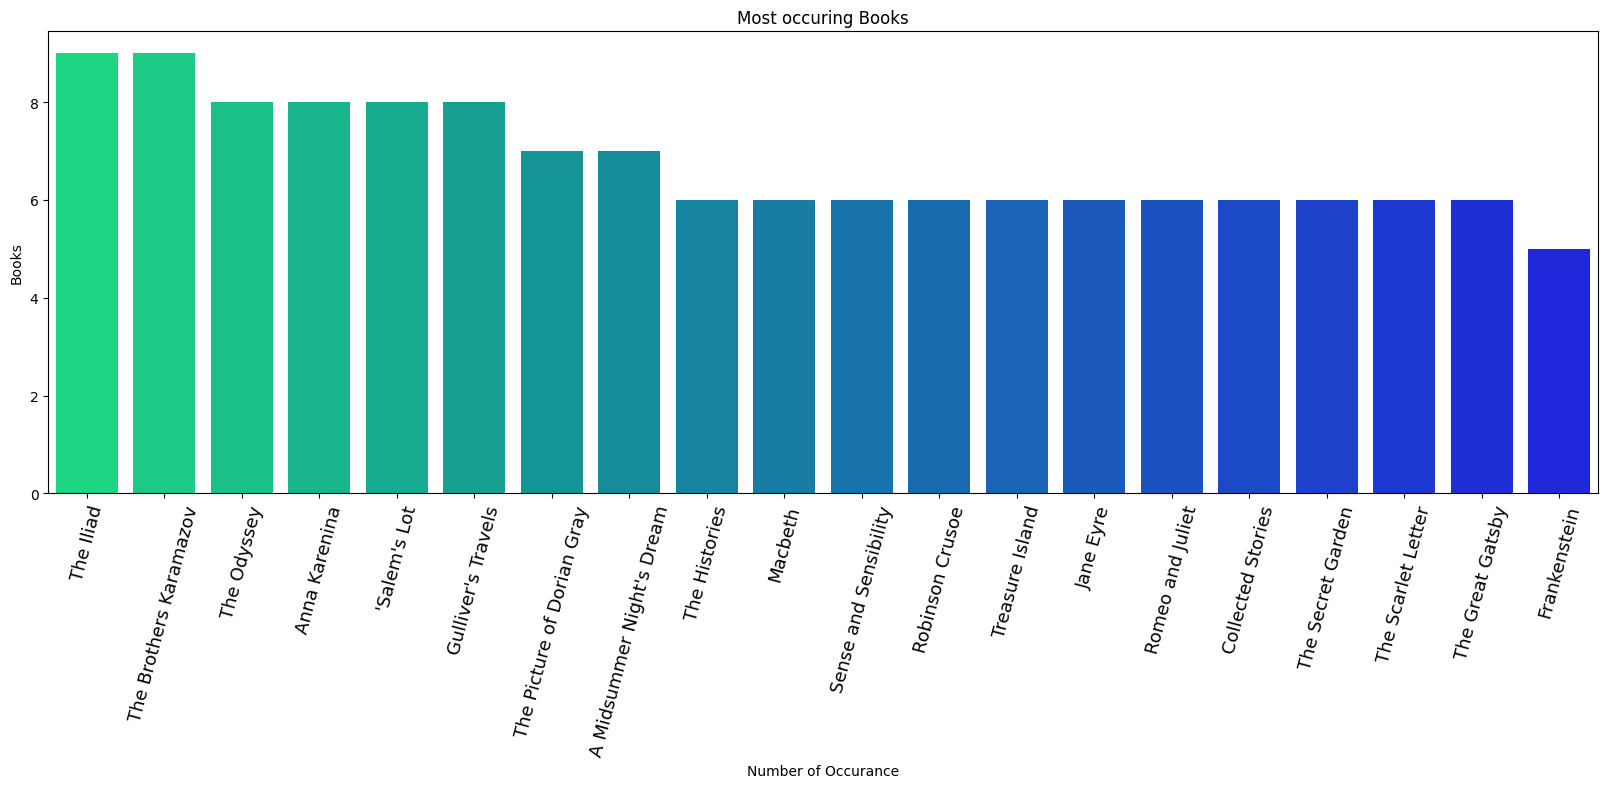

In [ ]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

<ipython-input-65-c7a8c5455b40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


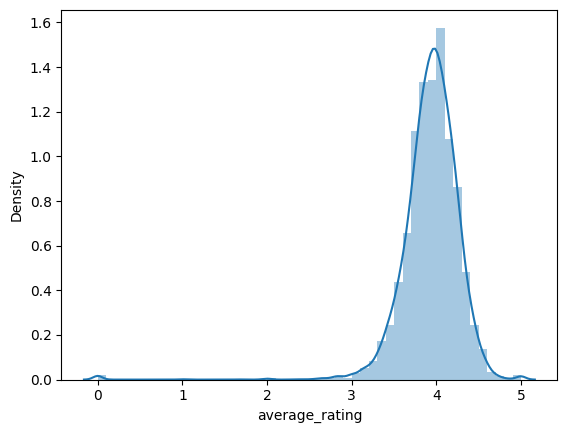

In [ ]:
sns.distplot(df['average_rating'])
plt.show()

In [ ]:
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

title  \
624    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
786                    Willem de Kooning: Late Paintings   
855    Literature Circle Guide: Bridge to Terabithia:...   
1243   Middlesex Borough (Images of America: New Jersey)   
4125   Zone of the Enders: The 2nd Runner Official St...   
4788   The Diamond Color Meditation: Color Pathway to...   
4933   Bulgakov's the Master and Margarita: The Text ...   
5023   The Complete Theory Fun Factory: Music Theory ...   
5474   The Goon Show  Volume 4: My Knees Have Fallen ...   
5476   The Goon Show  Volume 11: He's Fallen in the W...   
5647                                 Winchester Shotguns   
5648   Colossians and Philemon: A Critical and Exeget...   
6184                           Taxation of Mineral Rents   
6247                         The New Big Book of America   
6775   Delwau Duon: Peintiadau Nicholas Evans = Symph...   
8544        Fanning the Flame: Bible  Cross  and Mission   
9282   Oliver Wendell Holmes in Paris: Medicine  Theo...   
9324                  Tyrannosaurus Wrecks (Stanley  #1)   
9720       The Irish Anatomist: A Study of Flann O'Brien   
9847   The American Campaign: U.S. Presidential Campa...   
9893   His Princess Devotional: A Royal Encounter Wit...   
10262         Bill Gates: Computer Legend (Famous Lives)   

                                                 authors language_code  \
624                  Aristophanes/F.W. Hall/W.M. Geldart           grc   
786                      Julie Sylvester/David Sylvester           eng   
855                                       Tara MacCarthy           eng   
1243                Middlesex Borough Heritage Committee           eng   
4125                                          Tim Bogenn           eng   
4788                                       John  Diamond           eng   
4933                                     Elena N. Mahlow           eng   
5023                     Ian        Martin/Katie Elliott           eng   
5474                                          NOT A BOOK           eng   
5476                                          NOT A BOOK           eng   
5647                            Dennis Adler/R.L. Wilson           eng   
5648                                      R. McL. Wilson           eng   
6184                                        Ross Garnaut           eng   
6247                                Todd Davis/Marc Frey           eng   
6775                     Nicholas    Evans/Rhonda  Evans           wel   
8544    Chris    Green/Chris Wright/Paul Douglas Gardner           eng   
9282                                  William C. Dowling           eng   
9324   Laura Driscoll/Alisa Klayman-Grodsky/Eric     ...           eng   
9720                                       Keith Donohue           eng   
9847                                   James E. Campbell           eng   
9893                                 Sheri Rose Shepherd           eng   
10262                                   Sara Barton-Wood           eng   

                             publisher  
624       Oxford University Press  USA  
786                     Schirmer Mosel  
855                 Teaching Resources  
1243                Arcadia Publishing  
4125                        BradyGames  
4788             Square One Publishers  
4933                     Vantage Press  
5023               Boosey & Hawkes Inc  
5474                BBC Physical Audio  
5476                BBC Physical Audio  
5647                   Chartwell Books  
5648                   T&T Clark Int'l  
6184      Oxford University Press  USA  
6247                     Courage Books  
6775                           Y Lolfa  
8544                         Zondervan  
9282   University Press of New England  
9324                      Disney Press  
9720                   Academica Press  
9847        Texas A&M University Press  
9893                         Multnomah  
10262                         Raintree

In [ ]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: count, dtype: int64

<ipython-input-69-b41c0c1437ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')


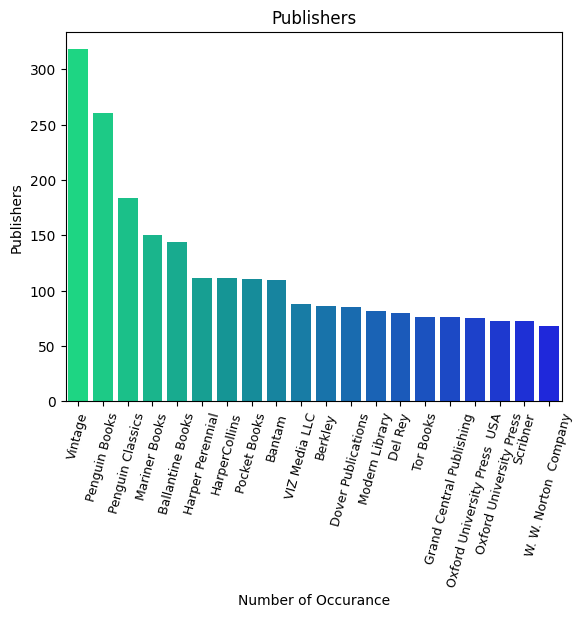

In [ ]:
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 9)
plt.show()

Recommending Books based on Publishers

Recommending Books based on Authors

Recommending Books based on Language

In [ ]:
df.publisher.value_counts()

publisher
Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: count, Length: 2290, dtype: int64

In [19]:
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

In [ ]:
recomd_books_publisheres('Vintage')

title  average_rating
7371   Remembrance of Things Past: Volume II - The Gu...            4.53
335    The Power Broker: Robert Moses and the Fall of...            4.51
10838   The Civil War  Vol. 1: Fort Sumter to Perryville            4.42
1775       The Son Avenger (The Master of Hestviken  #4)            4.40
1505                                      A Fine Balance            4.36
9626                                Nobody Knows My Name            4.35
2267                     The Stories of Vladimir Nabokov            4.30
3112                      All of Us: The Collected Poems            4.30
8787                                    Selected Stories            4.28
4019                                    Selected Stories            4.28

In [ ]:
recomd_books_publisheres('Penguin Books')

title  average_rating
4244                                 The Complete Maus            4.55
5564      The Penguin Companion to European Literature            4.50
1381   Before The Mayflower A History of Black America            4.44
4602                             Selected Non-Fictions            4.43
3011                           The Read-Aloud Handbook            4.41
4551             Life With Jeeves (Jeeves  #6  2  & 4)            4.39
1275                                      East of Eden            4.37
3304           Ludwig Wittgenstein: The Duty of Genius            4.36
4980                                 Life at Blandings            4.35
10867                      The Portable Dorothy Parker            4.34

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [17]:
@interact
def recomd_books_publishers(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

based upon Authors

In [18]:
@interact
def recomd_books_authors(author_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == author_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko T…

In [16]:
@interact
def recomd_books_language(lang_name = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == lang_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='lang_name', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger',…

Data Preprocessing

In [6]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [7]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [8]:
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

between 0 and 1  between 1 and 2  between 2 and 3  between 3 and 4  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   between 4 and 5  
0             True  
1             True  
2             True  
3             True  
4             True

In [9]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

ale    ara  en-CA  en-GB  en-US   eng    enm    fre    ger    gla  ...  \
0  False  False  False  False  False  True  False  False  False  False  ...   
1  False  False  False  False  False  True  False  False  False  False  ...   
2  False  False  False  False  False  True  False  False  False  False  ...   
3  False  False  False  False  False  True  False  False  False  False  ...   
4  False  False  False  False  False  True  False  False  False  False  ...   

      nl    nor    por    rus    spa    srp    swe    tur    wel    zho  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 27 columns]

In [10]:
features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()

between 0 and 1  \
title                                                                 
Harry Potter and the Half-Blood Prince (Harry P...            False   
Harry Potter and the Order of the Phoenix (Harr...            False   
Harry Potter and the Chamber of Secrets (Harry ...            False   
Harry Potter and the Prisoner of Azkaban (Harry...            False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...            False   

                                                    between 1 and 2  \
title                                                                 
Harry Potter and the Half-Blood Prince (Harry P...            False   
Harry Potter and the Order of the Phoenix (Harr...            False   
Harry Potter and the Chamber of Secrets (Harry ...            False   
Harry Potter and the Prisoner of Azkaban (Harry...            False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...            False   

                                                    between 2 and 3  \
title                                                                 
Harry Potter and the Half-Blood Prince (Harry P...            False   
Harry Potter and the Order of the Phoenix (Harr...            False   
Harry Potter and the Chamber of Secrets (Harry ...            False   
Harry Potter and the Prisoner of Azkaban (Harry...            False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...            False   

                                                    between 3 and 4  \
title                                                                 
Harry Potter and the Half-Blood Prince (Harry P...            False   
Harry Potter and the Order of the Phoenix (Harr...            False   
Harry Potter and the Chamber of Secrets (Harry ...            False   
Harry Potter and the Prisoner of Azkaban (Harry...            False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...            False   

                                                    between 4 and 5    ale  \
title                                                                        
Harry Potter and the Half-Blood Prince (Harry P...             True  False   
Harry Potter and the Order of the Phoenix (Harr...             True  False   
Harry Potter and the Chamber of Secrets (Harry ...             True  False   
Harry Potter and the Prisoner of Azkaban (Harry...             True  False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...             True  False   

                                                      ara  en-CA  en-GB  \
title                                                                     
Harry Potter and the Half-Blood Prince (Harry P...  False  False  False   
Harry Potter and the Order of the Phoenix (Harr...  False  False  False   
Harry Potter and the Chamber of Secrets (Harry ...  False  False  False   
Harry Potter and the Prisoner of Azkaban (Harry...  False  False  False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  False  False  False   

                                                    en-US  ...    por    rus  \
title                                                      ...                 
Harry Potter and the Half-Blood Prince (Harry P...  False  ...  False  False   
Harry Potter and the Order of the Phoenix (Harr...  False  ...  False  False   
Harry Potter and the Chamber of Secrets (Harry ...  False  ...  False  False   
Harry Potter and the Prisoner of Azkaban (Harry...  False  ...  False  False   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  False  ...  False  False   

                                                      spa    srp    swe  \
title                                                                     
Harry Potter and the Half-Blood Prince (Harry P...  False  False  False   
Harry Potter and the Order of the Phoenix (Harr...  False  False  False   
Harry Potter and the Chamber of Secrets (Harry ...  False  False  False   
Harry Potter and the Prisoner of Azkaban (Harry... 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [12]:
featuredf = pd.DataFrame(features, index = df['title'])
featuredf.head()

0    1    2    3    4   \
title                                                                         
Harry Potter and the Half-Blood Prince (Harry P...  0.0  0.0  0.0  0.0  1.0   
Harry Potter and the Order of the Phoenix (Harr...  0.0  0.0  0.0  0.0  1.0   
Harry Potter and the Chamber of Secrets (Harry ...  0.0  0.0  0.0  0.0  1.0   
Harry Potter and the Prisoner of Azkaban (Harry...  0.0  0.0  0.0  0.0  1.0   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  0.0  0.0  0.0  0.0  1.0   

                                                     5    6    7    8    9   \
title                                                                         
Harry Potter and the Half-Blood Prince (Harry P...  0.0  0.0  0.0  0.0  0.0   
Harry Potter and the Order of the Phoenix (Harr...  0.0  0.0  0.0  0.0  0.0   
Harry Potter and the Chamber of Secrets (Harry ...  0.0  0.0  0.0  0.0  0.0   
Harry Potter and the Prisoner of Azkaban (Harry...  0.0  0.0  0.0  0.0  0.0   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  0.0  0.0  0.0  0.0  0.0   

                                                    ...   24   25   26   27  \
title                                               ...                       
Harry Potter and the Half-Blood Prince (Harry P...  ...  0.0  0.0  0.0  0.0   
Harry Potter and the Order of the Phoenix (Harr...  ...  0.0  0.0  0.0  0.0   
Harry Potter and the Chamber of Secrets (Harry ...  ...  0.0  0.0  0.0  0.0   
Harry Potter and the Prisoner of Azkaban (Harry...  ...  0.0  0.0  0.0  0.0   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  ...  0.0  0.0  0.0  0.0   

                                                     28   29   30   31     32  \
title                                                                           
Harry Potter and the Half-Blood Prince (Harry P...  0.0  0.0  0.0  0.0  0.914   
Harry Potter and the Order of the Phoenix (Harr...  0.0  0.0  0.0  0.0  0.898   
Harry Potter and the Chamber of Secrets (Harry ...  0.0  0.0  0.0  0.0  0.884   
Harry Potter and the Prisoner of Azkaban (Harry...  0.0  0.0  0.0  0.0  0.912   
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  0.0  0.0  0.0  0.0  0.956   

                                                          33  
title                                                         
Harry Potter and the Half-Blood Prince (Harry P...  0.455816  
Harry Potter and the Order of the Phoenix (Harr...  0.468317  
Harry Potter and the Chamber of Secrets (Harry ...  0.001377  
Harry Potter and the Prisoner of Azkaban (Harry...  0.508864  
Harry Potter Boxed Set  Books 1-5 (Harry Potter...  0.009011  

[5 rows x 34 columns]

Model Building


In [14]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(n_neighbors=6, algorithm='ball_tree',metric='euclidean')
model.fit(featuredf)
dist, idlist = model.kneighbors(featuredf)

In [27]:
@interact
def BookRecomender(book_name=list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid]['title'])

    return book_list_name


interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…